# Stærðfræði og reiknifræði – Skiladæmi 8

In [3]:
#BYRJA -- Keyrið til að frumstilla.
import numpy as np, numpy.random as npr, numpy.linalg as la
import scipy.stats as stat, statsmodels.api as sm
import matplotlib.pyplot as plt, matplotlib.colors as clrs
from scipy.cluster.vq import kmeans, whiten, vq
from_list = clrs.LinearSegmentedColormap.from_list
plt.rc('axes', axisbelow=True)
%matplotlib inline
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=4, floatmode='fixed', suppress=True)
# qcmap skilar n-staka "qualitative colormap" til að nota til að teikna
# flokkun, t.d. plt.scatter(x, y, c=z, cmap=qcmap(4)) til að teikna fjóra flokka
def qcmap(n): return from_list("",plt.get_cmap('Set1')(range(0,n)),n)

## 1. Flokkun veðurgagna með k-means
**A. Flokkun á veðri.** Ekki tókst að flokka Stykkishólmsveðurgögnin í heit/köld/þurr/blaut ár í síðasta fyrirlestri, svo þið fáið að spreyta ykkur á dæminu hér. *Sem sé*: Lesið skrána `hiti-úrkoma.txt` inn í þrjá vigra: ár, hiti, úrkoma. Búið til n x 2 fylki úr hita og úrkomu, staðlið það með `whiten` og flokkið í fjóra flokka með `kmeans` og `vq`. Teiknið og bætið við colorbar.

**B. Meðalhiti og -úrkoma** Finnið meðalhita og úrkomu í hverjum flokki og teiknið inn á grafið. Athugið að þessi liður er ekki alveg beint af augum því stöðlunin eyðilagði það að hægt sé að lesa svörin beint út úr "code-book" töflunni sem `kmeans` skilar.

In [4]:
# slice-a column 2 og 3
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
y = x[:, [1,2]]

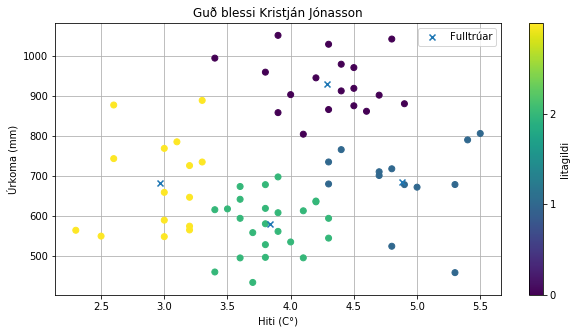

In [8]:
#1AB
npr.seed(42) # Svo alltaf komi sama út
# a 
ar, hiti, urkoma = np.loadtxt('hitiurkoma.txt').T
# til ad fa hita og urkomu i n x 2 fylki set eg allt i n x 3 fylki
hinrik = np.loadtxt('hitiurkoma.txt') # tha sleppi eg transpose
# og slice-a column 2 og 3
kristjan = hinrik[:, [1,2]]
loftur = whiten(kristjan)
cb, d = kmeans(loftur, 4)
code, dv = vq(loftur, cb)
#disp(code)
plt.figure(figsize=(10,5))
plt.scatter(hiti, urkoma, c=code)
plt.colorbar(ticks=[0,1,2],label='litagildi')
plt.title('Guð blessi Kristján Jónasson')
plt.xlabel('Hiti (C°)')
plt.ylabel('Úrkoma (mm)')
plt.grid()
# b
# þetta hér er algjöört kjaftæði
medalhiti = np.zeros(4)
medalurk = np.zeros(4)
for i in range(4):
    medalhiti[i] = np.mean( hiti[code==i] )
    medalurk[i] = np.mean( urkoma[code==i] )
plt.scatter(medalhiti,medalurk,marker='x',label='Fulltrúar') # pottþétt vitlaust
plt.legend();

***Ath um litaskala:*** *Ég var að föndra við litaskala og teikningu flokka, og niðurstaðan var fallið í byrjunarreitnum hér að ofan, `qcmap(n)` sem skilar flokkunarlitaskala (*qualitative colormap*) með `n` vel aðgreinanlegum litum sem hentar til að teikna *scatterplot* af strjálum gögnum með `n ≤ 9` flokkum. Það er gert með:

      plt.scatter(x, y, c=litur, cmap=qcmap(n))

*Tilheyrandi `colorbar` má svo fá með*

      plt.colorbar(ticks=range(0,n)); plt.clim(-0.5, n-0.5)

**C. Fleiri flokkar.** Flokkið líka í 6 flokka og teiknið. Reynið að finna lýsingu á flokkunum, t.d. "blaut og heit ár", "þurr og meðalhlý ár".

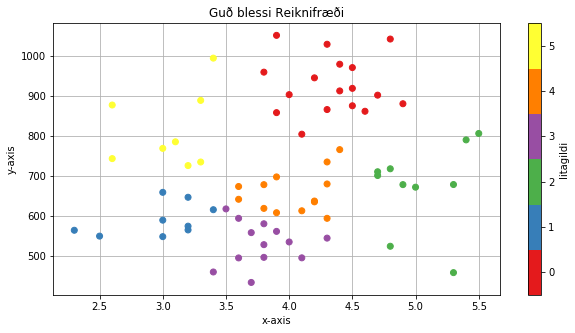

In [9]:
#1C
n = 6
cb, d = kmeans(loftur,n)
code, dv = vq(loftur, cb)
#disp(code)
plt.figure(figsize=(10,5))
plt.scatter(hiti, urkoma, c=code, cmap=qcmap(n))
plt.colorbar(ticks=range(0,n),label='litagildi')
plt.clim(-0.5, n-0.5)
plt.title('Guð blessi Reiknifræði')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()

## 2. Flokkun eftir orðtíðni.
Í þessu verkefni á að flokka Wikipediugreinar með *k-means*. 

**A.** Lesið inn gögnin sem notuð voru í S7.3 inn í fylki X (sjá næsta reit). Kallið á `whiten` til að staðla gögnin. Skoðið áhrif þess með því að reikna staðalfrávik orðtíðni orða nr. 100 og 200 fyrir og eftir stöðlunina.

**B.** Flokkið í $k = 2, 3,...,10$ flokka, finnið gildi markfallsins fyrir hvern flokkafjölda og teiknið graf af niðurstöðunni. Við mundum búast við að fá umtalsvert lægra gildi fyrir `k ≥ 5` því vitum að greinarnar fjalla um 5 mismunandi efnisflokka.

**C.** Finnið flokk hverrar greinar með `vq` þegar k = 5. Skrifið út titla og flokka fyrstu 5 greinanna ásamt fjarlægð þeirra frá sínum fulltrúa.

**D.** Ákvarðið og skrifið töflu yfir fjölda greina í hverjum flokki og einkenni flokkanna (*listir, fjarskipti, veðurfræði, pokemon, SÞ-stofnanir*) þegar k = 5.

**E.** Finnið meðalfjarlægð greina hvers flokks frá fulltrúa flokksins.

In [204]:
#2
npr.seed(42)
# a
data = np.load('wikitidni.npz')
ord = data["dictionary"]
grein = data["article_titles"]
X = data["article_histograms"]

In [222]:
cb, dist = kmeans(X,5)
c, dv = vq(X,cb)
flokkar = ['Listir', 'Fjarskipti', 'Vedurfraedi', 'SÞ-stofnanir', 'Pokemon']
[print(grein[i], "| Flokkur:", c[i], "| Fjarlaegd: ", dv[i]) for i in range(0,5)]

A Bar at the Folies-Bergère | Flokkur: 0 | Fjarlaegd:  0.8790328135490191
Acid rain | Flokkur: 2 | Fjarlaegd:  0.9433328555756473
Albedo | Flokkur: 2 | Fjarlaegd:  0.9820408266080197
Alfred Sisley | Flokkur: 0 | Fjarlaegd:  0.7420871732802294
Amplitude modulation | Flokkur: 4 | Fjarlaegd:  0.8524189494329683


[None, None, None, None, None]

In [224]:
print("Flokksnumer ", "Flokkur \t \t", "Lengd"  )
for i in range(5):
    print(" ", i, "        ", " ", flokkar[i], "   \t", len(c[c==i]))

Flokksnumer  Flokkur 	 	 Lengd
  0            Listir    	 47
  1            Fjarskipti    	 32
  2            Vedurfraedi    	 98
  3            SÞ-stofnanir    	 66
  4            Pokemon    	 57


In [225]:
medal = dist / len(c)
print(medal)

0.002897554494492403
